<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793006/blob/main/A01793006_Reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATOS GENERALES**

Alumna: Diana Valeria Garcia Briones

Matricula: A01793006

Actividad Semanal -- 5 Repaso Transformación y reducción de dimensiones




---



# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [1]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print('D',values) #D
print('W',vectors) #W

#Ejemplo de reconstrucción
values, vectors = np.linalg.eig(A) #eig se utiliza en una matriz cuadrada
W = vectors
Winv = np.linalg.inv(W) #inv se utiliza para una matriz inversa
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------

B= np.dot(W,D) #Multiplicacion
B = np.dot(B,Winv)
#print(np.real(B)) como los resultados eran flotantes se imprrimian con un decimal

myArray = B.astype(int)
print(myArray)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
D [ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
W [[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1 2 3]
 [3 4 6]
 [6 7 9]]
-----------------------------


In [2]:
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
values, vectors = eig(A)
print(values) #D
print(vectors) #W

[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]


In [6]:
#Matriz 1
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A1 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original-------")
print(A1)
print("-----------------------------")
#Calcula la eigendescomposición
values, vectors = eig(A1)
print('D',values) #D
print('W',vectors) #W

#Reconstrucción
values, vectors = np.linalg.eig(A1) #eig se utiliza en una matriz cuadrada
W = vectors
Winv = np.linalg.inv(W) #inv se utiliza para una matriz inversa
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")

# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?

#MI CODIGO
B1 = np.dot(W,D) #Multiplicacion de matrices, siguiendo el orden de funciones primero multiplique las primeras dos matrices y el resultado de este por la tercer matriz
B1 = np.dot(B1,Winv) #Multiplicacion por la tercer matriz
#print(np.round(B1)) #como los resultados eran flotantes se imprrimian con un decimal

myArray1 = B1.round().astype(int) #redondeamos y tomamos los valores reales
print(myArray1)
print("-----------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
D [3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
W [[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: ComplexWarning: Casting complex values to real discards the imaginary part


In [7]:
#Matriz 2
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(A2)
print("-----------------------------")
#Calcula la eigendescomposición
values, vectors = eig(A2)
print('D',values) #D
print('W',vectors) #W

#Reconstrucción
values, vectors = np.linalg.eig(A2) #eig se utiliza en una matriz cuadrada
W = vectors
Winv = np.linalg.inv(W) #inv se utiliza para una matriz inversa
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")

# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?

B2 = np.dot(W,D) #Multiplicacion de matrices, siguiendo el orden de funciones primero multiplique las primeras dos matrices y el resultado de este por la tercer matriz
B2 = np.dot(B2,Winv) #Multiplicacion por la tercer matriz
#print(np.round(B1)) #como los resultados eran flotantes se imprrimian con un decimal

myArray2 = B2.round().astype(int) #redondeamos y tomamos los valores reales
print(myArray2)
print("-----------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
D [ 3. -2.  1.]
W [[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------


In [8]:
#Matriz 3
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original-------")
print(A3)
print("-----------------------------")
#Calcula la eigendescomposición
values, vectors = eig(A3)
print('D',values) #D
print('W',vectors) #W

#Reconstrucción
values, vectors = np.linalg.eig(A3) #eig se utiliza en una matriz cuadrada
W = vectors
Winv = np.linalg.inv(W) #inv se utiliza para una matriz inversa
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")

# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?

B3 = np.dot(W,D) #Multiplicacion de matrices, siguiendo el orden de funciones primero multiplique las primeras dos matrices y el resultado de este por la tercer matriz
B3 = np.dot(B3,Winv) #Multiplicacion por la tercer matriz
#print(np.round(B1)) #como los resultados eran flotantes se imprrimian con un decimal

myArray3 = B3.round().astype(int) #redondeamos y tomamos los valores reales
print(myArray3)
print("-----------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
D [ 6.89167094 -0.214175   -0.67749594]
W [[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------


**Comentarios de Ejercicio 1**

*Con respecto a la pregunta planteada en el ejercicio sobre si la reconstruccion utilizando la formula B=W*D*Winv, genera los mismos valores que la matriz original, la respuesta para mi caso es si. Al realizar el ejercicio con las 3 matrices, logre conseguir recuperar los mismos valores en las matrices reconstruidas que las originales sin ninguna diferencia o perdida de dato, sin embargo, es importante destacar que tuve que redondear los numeros despues de la multiplicacion y en algunos casos tomar unicamente los valores reales.*

*Justifico esto ya que durante las operaciones se tranformaron/manipularon de igual manera los datos originales con flotantes extensos u otras representaciones, por lo que para obtener los mismos resultados tuve que investigar sobre la resconstruccion de datos, probar diferentes funciones y despues utilizar las que mas funcionaban para este caso, que fueron round y astype*

---



**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


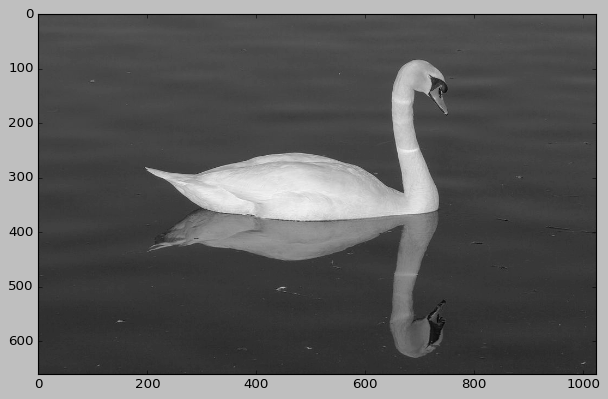

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FD05E37D650>


In [9]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [10]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [11]:
U.shape

(660, 660)

In [12]:
V.shape

(1024, 1024)

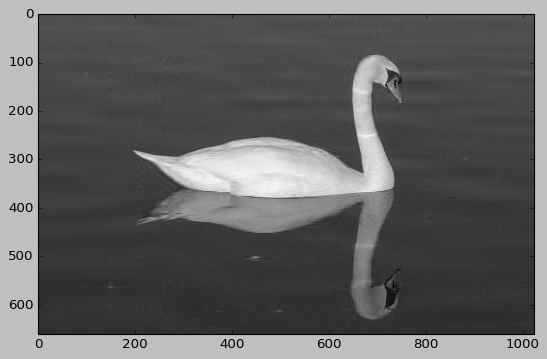

Felicidades la imagen está comprimida


In [ ]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[171. 172. 173. ... 194. 199. 202.]


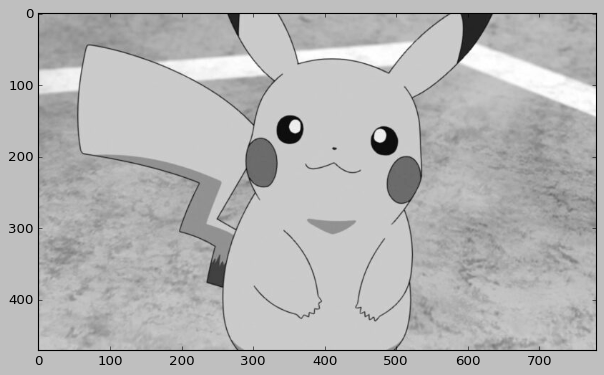

<PIL.Image.Image image mode=LA size=780x470 at 0x7FD056C33850>
(470, 780)
U (470, 470)
V (780, 780)


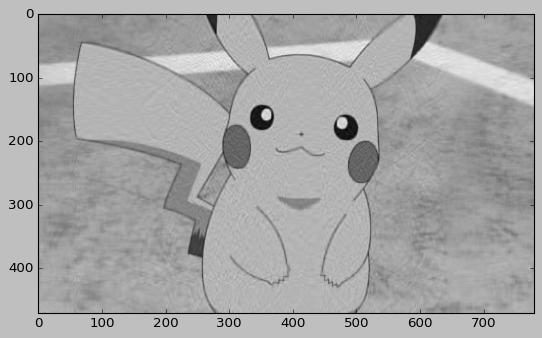

Felicidades la imagen está comprimida


In [13]:
#imagen 1 : Mi codigo
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img1 = Image.open(urllib.request.urlopen('https://gcdn.lanetaneta.com/wp-content/uploads/2022/06/El-clon-de-Pikachu-mas-obvio-de-cada-generacion-de-780x470.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray1 = img1.convert('LA')
imgmat1 = np.array(list(imggray1.getdata(band=0)),float)

print(imgmat1)

imgmat1.shape = (imggray1.size[1],imggray1.size[0])


plt.figure(figsize=(9,6))
plt.imshow(imgmat1,cmap='gray')
plt.show()
print(img1)

U,D,V = np.linalg.svd(imgmat1)
print(imgmat1.shape)
print('U',U.shape)
print('V',V.shape)

nvalue1 = 64 #Valor aleatorio
#------------------------------
reconstimg1 = np.matrix(U[:,:nvalue1])*np.diag(D[:nvalue1])*np.matrix(V[:nvalue1,:])
#ve las dimensiones de la imagen y su descomposicion

plt.imshow(reconstimg1,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[141. 141. 140. ...  41.  42.  43.]


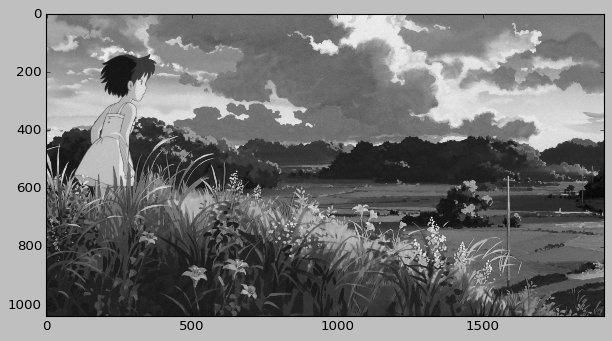

<PIL.Image.Image image mode=LA size=1920x1038 at 0x7FD056C80690>
(1038, 1920)
U (1038, 1038)
V (1920, 1920)


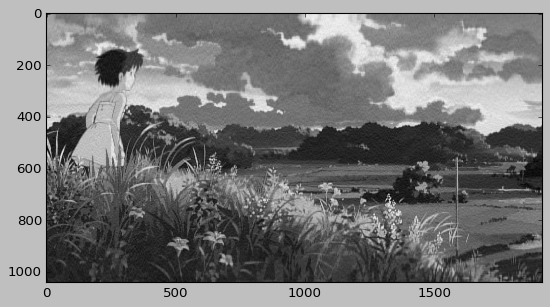

Felicidades la imagen está comprimida


In [14]:
#imagen 2: Mi codigo modificado
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img1 = Image.open(urllib.request.urlopen('https://img1.ak.crunchyroll.com/i/spire3/1aa9e0aa1949e2d3d746adab710a25571654746013_main.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray1 = img1.convert('LA')
imgmat1 = np.array(list(imggray1.getdata(band=0)),float)

print(imgmat1)

imgmat1.shape = (imggray1.size[1],imggray1.size[0])


plt.figure(figsize=(9,6))
plt.imshow(imgmat1,cmap='gray')
plt.show()
print(img1)

U,D,V = np.linalg.svd(imgmat1)
print(imgmat1.shape)
print('U',U.shape)
print('V',V.shape)

nvalue1 = 105 #Valor aleatorio
#------------------------------
reconstimg1 = np.matrix(U[:,:nvalue1])*np.diag(D[:nvalue1])*np.matrix(V[:nvalue1,:])
#ve las dimensiones de la imagen y su descomposicion

plt.imshow(reconstimg1,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[255. 255. 255. ... 255. 255. 255.]


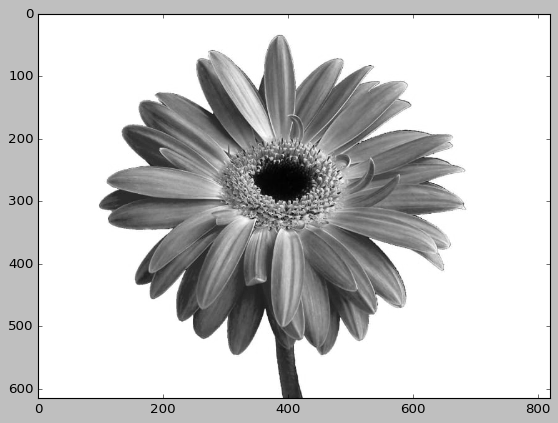

<PIL.Image.Image image mode=LA size=820x615 at 0x7FD055B5C190>
(615, 820)
U (615, 615)
V (820, 820)


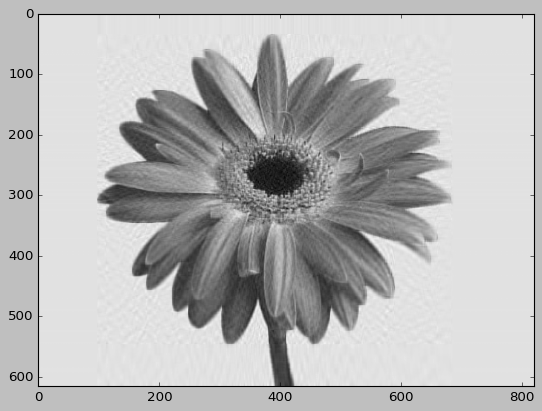

Felicidades la imagen está comprimida


In [15]:
#imagen 3: Mi codigo modificado
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img1 = Image.open(urllib.request.urlopen('https://cdn.domestika.org/c_fill,dpr_auto,f_auto,q_auto,w_820/v1532123613/content-items/002/432/439/flor_sin_fondo-original.jpg?1532123613')).convert('LA')
#img = Image.open('lucy.jpg')
imggray1 = img1.convert('LA')
imgmat1 = np.array(list(imggray1.getdata(band=0)),float)

print(imgmat1)

imgmat1.shape = (imggray1.size[1],imggray1.size[0])


plt.figure(figsize=(9,6))
plt.imshow(imgmat1,cmap='gray')
plt.show()
print(img1)

U,D,V = np.linalg.svd(imgmat1)
print(imgmat1.shape)
print('U',U.shape)
print('V',V.shape)

nvalue1 = 60 #Valor aleatorio
#------------------------------
reconstimg1 = np.matrix(U[:,:nvalue1])*np.diag(D[:nvalue1])*np.matrix(V[:nvalue1,:])
#ve las dimensiones de la imagen y su descomposicion

plt.imshow(reconstimg1,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

**Comentarios de Ejercicio 2**

*¿Cuantos valores crees que son necesarios? De forma teorica no existe un numero exacto que sea el estandar y deba de seleccionarse en todos los casos, de igual manera, pudimos comprobar en el ejercicio que la seleccion de esta variable depende de diferentes factores.*

*Creo que la cantidad de valores esta relacionada con la complejidad de la imagen, ya sea la cantidad de pixeles, definicion, saturacion, fondo, colores y objetos, solo por mencionar algunos factores.* 

*Sustento el comentario, ya que en la matriz 2 intente utilizar una imagen mas compleja, con mayor cantidad de elementos visuales, para este caso la cantidad de variables minima que necesitaba para que la cara del personaje no se distorsionara era de 105; Aun asi se logro comprimir y disminuir considerablemente el tamaño de la imagen, pero si fue un incremento considerable con respecto a la matriz 1 y 3 donde utilice imagenes muchas mas sencillas y el valor de la varible oscilaba  entre 50-60 conservando una imagen bastante nitida.*


---

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




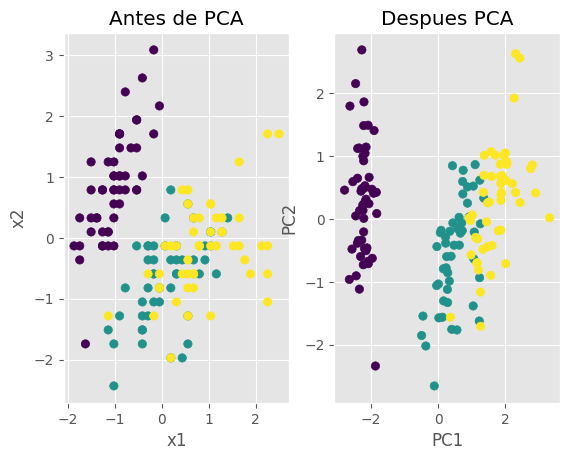

In [19]:
#tu codigo aqui
#Importacion de librrias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

# Carga de informacion
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Z-score 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Modelo PCA
pca = PCA(n_components=2) # Estimacion utilizando 2 PCs
X_new = pca.fit_transform(X) # Proyeccion de los datos originales en un espacio PCA

##Codigo para desplegar el grafico
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Antes de PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Despues PCA')
plt.show()


In [20]:
#Representacion en porcentajes de los PC 1 y PC 2
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


La prueba de máxima varianza también se puede ver estimando la matriz de covarianza del espacio reducido.

Estos valores son iguales a los valores propios reales de la covarianza.


In [21]:
print(np.cov(X_new.T)) #estimacion con la matriz de covarianza del espacio reducido

print('\n',pca.explained_variance_) #valores propios reales de la covarianza


[[2.93808505e+00 5.33928780e-16]
 [5.33928780e-16 9.20164904e-01]]

 [2.93808505 0.9201649 ]


In [22]:
#Se utiliza biplot para visualizar el analisis PCA
def biplot(score, coeff , y):

    xs = score[:,0] # Proyeccion en PC1
    ys = score[:,1] # Proyeccion en PC2
    n = coeff.shape[0] # Numero de Variables a utilizar
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) #Los colores se asignan de acuerdo al grupo
    for i in range(n):
       #Grafica de flechas (cada variable tiene una puntuación para PC1 y otra para PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

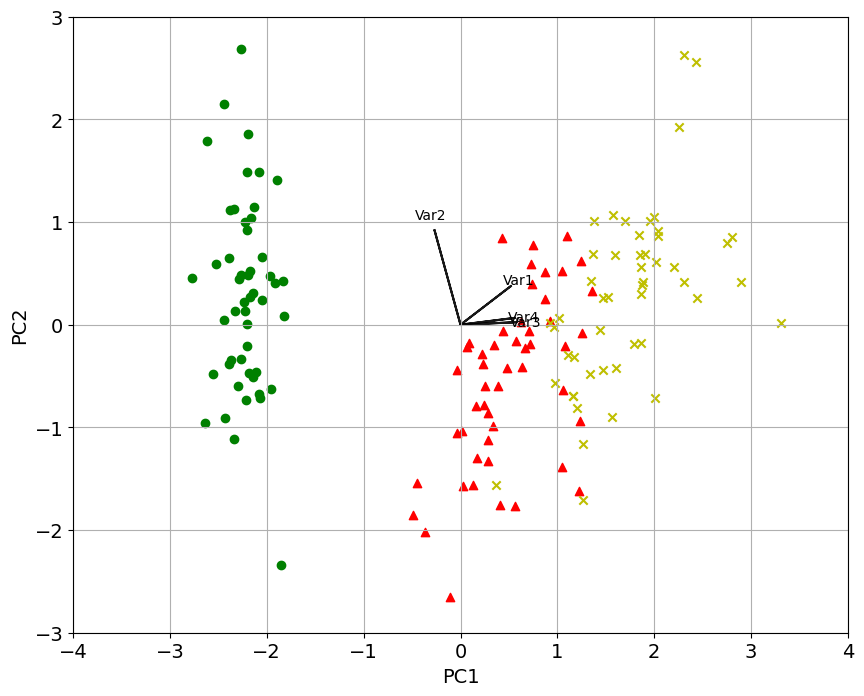

Correlacion Positiva 0.9628654314027957
correlacion Negativa -0.42844010433054014


In [23]:
#Impresion del grafico
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) 
#Llamos a la funcion usando las dos primeras variables
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

#Verificamos la correacion positiva que existe entre Var 3 y Var 4 
print('Correlacion Positiva',(np.corrcoef(X[:,2], X[:,3])[1,0]))

#Verificamos la correacion negativa que existe entre Var 2 y Var 3
print('correlacion Negativa',np.corrcoef(X[:,1], X[:,2])[1,0])


#Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

**¿Qué es feature importance y para que nos sirve?**

*Feature importance nos sirve para encontrar las características del conjunto de datos que tienen mayor influencia en los Componentes Principales.*

*Recordemos que los componentes principales son combinaciones de las variables originales que buscan conseguir la mayor varianza del conjunto.*

*Determinar cuáles son las variables mas importantes nos permiten enfocar nuestro análisis en aquellas que tienen mayor peso en nuestro conjunto minimizando cualquier tipo de sesgo, encontrar relaciones entre nuestras variables, así como si en determinado momento se tienen recursos limitados (ya sea de cómputo, presupuesto, tiempo o personal) para realizar actividades de análisis, podemos hacer una reducción de dimensionalidad sin perder las variables o información significativa generando un resultado que sea eficiente.*


**¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**

*Poder comprobar que los valores propios de la matriz de covarianza original son los mismos valores que en varianzas con dimensiones reducidas, es una comparativa que nos permite validar si nos hemos equivocado en la aplicacion de cualquiera de estos dos metodos, al no obtener los mismos resultados.
Esta comparativa se puede realizar dentro de los primeros pasos de PCA al obtener la matriz, por lo que es posible encontrar un error o discrepancia antes de haber realizado todo el analisis.*

*Por otra parte, la implementación bitblop tambien fue de las más relevantes para mi, ya que desconocía esta metodologia que nos genera un “resumen” de los puntos más importantes del Análisis de Componentes. 
Nos permite verificar mediante graficos: la maximizacion de las varianzas, las variables mas importantes en los componentes principales, asi como la correlacion entre estas.*


**¿Donde lo aplicarias o te seria de utilidad este conocimiento?**

*La aplicacion del Analisis de Componentes Principales se encuentra dentro del Analisis Exploratorio de Datos, por lo que creo que lo aplicaria en el mismo orden ya que durante la exploracion permite reconocer las variables mas y menos relevantes, sus correlaciones y varianzas. 
Además de la exploración de datos, PCA es bastante funcional para la reduccion de dimensiones, pues tener una gran cantidad de caracteristicas afecta la precision del analisis de datos asi como tiende a generar ruido en modelos de inteligencia.*

*PCA puede aplicarse en cualquier escenario que cumpla con las siguientes condiciones:*
1. *En procesamiento de datos con multicolinealidad entre las características/variables.*
2. *Cuando tenemos muchas variables.*
3. *Para eliminar ruido y comprimir de datos.*
